# ANALYSIS OF THE BUSINESS DATA OF AN ACQUISITION TARGET RETAILER ( PHASE ONE)

## INTRODUCTION

A mega store planning to acquire another retailer in order to expand its market shares needs the skills of a data analyst to 
analyze the business data of the target retailer in order to know whether it will be a good acquisiton.

As expected, they sent over a few data sets of the target retailer relating to their customers and sales.
These datasets will be useful in this phase of analysis to give insights on the business stratagy of the retailer and 
which will help in deciding if the acquisition will be considered or not.

The results of this phase determines whether or not to take a look at more data sets of the retailer in a phase two project, to further strengthen our decision on acquiring the retail in question.

The key Objectives of this project is to:

1. Read in Data from multiple csv files
2. Explore data containing millions of rows
3. Create new columns to aid in analysis
4. Filter, sort, and aggregate the data to pinpoint and summarize the important information
5. Build plots to communicate key insights
6. Give my thoughts where I deem fit and give my recommendation at the end

#### IMPORTING LIBRARIES

In [1]:
# Import the Numpy and Pandas libraries for this project

import pandas as pd
import numpy as np

### DATA EXPLORATION

In this section, I want to:

1. Read in the data sets and explore it.

2. Take a look at the raw data, the datatypes, and cast columns to appropiate data types to optimize memory usage.

3. Check for missing data

4. Check the number of unique households and products in the data, as this gives us a clue of our customer size and product range

In [2]:
# Read in the transactions data and explore

transactions = pd.read_csv(
    "C:\\ORIGINAL PFDA RESOURCES\\Pandas+Course+Resources\Pandas Course Resources\\project_data\\project_transactions.csv"
)

transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0


In [3]:
# Take a quick glance about the transactions table, including the memory usage.

transactions.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int64  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int64  
 5   SALES_VALUE        float64
 6   STORE_ID           int64  
 7   RETAIL_DISC        float64
 8   WEEK_NO            int64  
 9   COUPON_DISC        float64
 10  COUPON_MATCH_DISC  float64
dtypes: float64(4), int64(7)
memory usage: 180.1 MB


In [4]:
# Do a quick aggragtion to understand the numerical data, this will aid in downcasting our data types

transactions.describe().round(2)

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
count,2146311.00,2.146311e+06,2146311.00,2146311.00,2146311.00,2146311.00,2146311.00,2146311.00,2146311.00,2146311.00,2146311.00
mean,1056.23,3.404897e+10,389.51,2884714.94,100.97,3.11,3267.94,-0.53,56.33,-0.02,-0.00
std,605.01,4.723748e+09,190.05,3831949.29,1152.36,4.19,9122.39,1.23,27.15,0.21,0.04
min,1.00,2.698490e+10,1.00,25671.00,0.00,0.00,1.00,-130.02,1.00,-55.93,-7.70
25%,548.00,3.040798e+10,229.00,917231.00,1.00,1.29,330.00,-0.68,33.00,0.00,0.00
50%,1042.00,3.281176e+10,392.00,1027960.00,1.00,2.00,372.00,0.00,57.00,0.00,0.00
75%,1581.00,4.012804e+10,555.00,1132771.00,1.00,3.49,422.00,0.00,80.00,0.00,0.00
max,2099.00,4.230536e+10,711.00,18316298.00,89638.00,840.00,34280.00,3.99,102.00,0.00,0.00


In [5]:
# Downcast the columns into the appropriate data types where necessary

transactions = transactions.astype(
    {
        "DAY": "int16",
        "QUANTITY": "int32",
        "STORE_ID": "int32",
        "WEEK_NO": "int8"
    }
)  

# NOTE: SOME NUMERICAL DATA SETS REQUIRE US TO CHECK BOTH MAX AND MIN VALUES WHEN CASTING, SO AS TO KNOW THE RANGE

In [6]:
# Check the info again

transactions.info(memory_usage="deep")

# The size of the dataframe was redueced by over 40MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int16  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int32  
 5   SALES_VALUE        float64
 6   STORE_ID           int32  
 7   RETAIL_DISC        float64
 8   WEEK_NO            int8   
 9   COUPON_DISC        float64
 10  COUPON_MATCH_DISC  float64
dtypes: float64(4), int16(1), int32(2), int64(3), int8(1)
memory usage: 137.1 MB


In [7]:
# Check for missing values

transactions.isna().sum()

# There are no missing value in the transactions datafame

household_key        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
dtype: int64

In [8]:
# How many unique hosueholds are in our data?

transactions.loc[:, "household_key"].nunique()

2099

In [9]:
# Check the number of unique products in the store

transactions.loc[:, "PRODUCT_ID"].nunique()

84138

## COLUMN CREATION

In this section, I will create new columns that will aid in our analysis to understand the business better.

I will do the following:

1. Create a column that captures the total_discount by row.

2. Create a column of percentage disount (positive).

3. If the percentage discount is greater than 1, set it equal to 1. If it is less than 0, set it to 0 (as instructed by the mega store)

4. Drop the individual discount columns (RETAIL_DISC, COUPON_DISC, COUPON_MATCH_DISC).

5. Overwrite the existing transaction DataFrame after making the modifications above.

In [10]:
# create a discount sum column and a positive percentage discount column

transactions["total_discount"] = (transactions.loc[:, "RETAIL_DISC"]) + (transactions.loc[:, "COUPON_DISC"])

transactions["pct_discount"] = ((transactions["total_discount"]) / (transactions["SALES_VALUE"])).abs()

transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,total_discount,pct_discount
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0,0.00,0.000000
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0,-0.40,0.133779
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0,0.00,0.000000
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0,-0.99,0.396000
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0,-0.79,1.316667


In [11]:
# Use the appropriate function or method to set values of percentage disount as instructed 

transactions = (transactions.where(~(transactions["pct_discount"] > 1), 1)
 .where(~(transactions["pct_discount"] < 0), 0)
)

In [13]:
# Drop the specified columns

transactions = transactions.drop(["COUPON_DISC", "RETAIL_DISC", "COUPON_MATCH_DISC"], axis=1)

transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,total_discount,pct_discount
0,1364,26984896261,1,842930,1,2.19,31742,1,0.00,0.000000
1,1364,26984896261,1,897044,1,2.99,31742,1,-0.40,0.133779
2,1364,26984896261,1,920955,1,3.09,31742,1,0.00,0.000000
3,1364,26984896261,1,937406,1,2.50,31742,1,-0.99,0.396000
4,1,1,1,1,1,1.00,1,1,1.00,1.000000


## STATISTICAL ANALYSIS

This section invloves the overall statistics of the target retailer, these statistics will help to determine the way the business is ran and to throw more light on whether my client should acquire it.

statistical analysis will be carried out to calculate some key figures like:

1. The total sales.
2. Total discount.
3. Overall percentage discount.
4. Total quantity sold.
5. Max quantity sold in a single row and determine whether this row have a high discount percentage.
6. Total sales value per basket.
7. Total sales value per household.

In [15]:
# Calculate the total sales

transactions.loc[:, "SALES_VALUE"].sum()

6598169.030000003

In [16]:
# Calculate the total discount

transactions.loc[:, "total_discount"].sum()

-919894.9499999998

In [18]:
# Calculate the overall discount percentage

transactions.loc[:, "total_discount"].sum() / transactions.loc[:, "SALES_VALUE"].sum()

# This shows that the business had a total of about 14 percent discount across all sales

-0.13941669966584644

In [19]:
# Total quantity sold

transactions.loc[:, "QUANTITY"].sum()

#  Relative to the total sales of about $6.6 million, a total quantity sold of about $2.1 million 
# indicates that the stores basically sells small or rather cheap items

216656184

In [20]:
# Maximum quantity sold in a single row

transactions.loc[:, "QUANTITY"].max()

#  To sell a wooping 89638 pieces of some products in a single row further ascrtain the fact that the 
# retailer majorly deals in cheap items

89638

In [24]:
# Inspect the row with the highest quantity further to know the percentage given on those items

transactions.loc[transactions["QUANTITY"].argmax()].round(2)


household_key     6.300000e+02
BASKET_ID         3.474915e+10
DAY               5.030000e+02
PRODUCT_ID        6.534178e+06
QUANTITY          8.963800e+04
SALES_VALUE       2.500000e+02
STORE_ID          3.840000e+02
WEEK_NO           7.300000e+01
total_discount   -1.345000e+01
pct_discount      5.000000e-02
Name: 1442095, dtype: float64

The above shows that the row with the highest quantity sold had a total of about $13 disount, and a percentage discount 
of 5% which is lesser than our overall percent discount.
This is good business strategy as the retailer did not place too much discount on the most sort after product.  

In [26]:
# THE TOTAL VALUE SALES PER BASKET

transactions["SALES_VALUE"].sum() / transactions["BASKET_ID"].nunique()

# At $28.5 sales per basket, this means their are loyal customers who visit the store frequently and that is a plus

28.458538334799798

In [27]:
# TOTAL SALES PER HOUSEHOLD

transactions["SALES_VALUE"].sum() / transactions["household_key"].nunique()

3143.482148642212

At a little over $3000 sales per household, it means the hosueholds keeps on coming back to the stores 
to buy items racking up to the total sales calculated earlier. Loyal customers are good for business

## HOUSEHOLD ANALYSIS AND VISUALIZATION


In this section of the project, visulization of our results will be done to give better understanding of the business data.

I will:

1. Plot the distribution of total sales value purchased at the household level.
2. Determine the top 10 households by quantity purchased.
3. Determine the top 10 households by sales value.
4. Plot the total sales value for our top 10 households by value, ordered from highest to lowest.

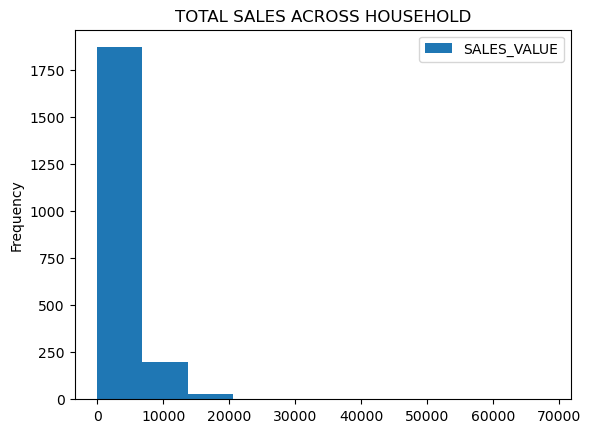

In [29]:
# Plot the distribution of total sales value across households

(transactions
 .groupby("household_key")
 .agg({"SALES_VALUE": "sum"})
).plot.hist(title= "TOTAL SALES ACROSS HOUSEHOLD");

In [31]:
# THESE ARE THE TOP TEN (10) HOUSEHOLD BY QUANTITY PURCHASED FROM HIGHEST TO LOWEST

top10_hh_by_qty = (transactions
 .groupby("household_key")
 .agg({"QUANTITY": "sum"})
 .sort_values(by="QUANTITY", ascending=False)
 .iloc[:10]
)

top10_hh_by_qty

,QUANTITY
household_key,
1023,4479886
755,3141759
1609,2146647
13,1863752
1430,1741739
1527,1705382
1762,1669645
707,1640080
1029,1496155


In [33]:
# THE TOP TEN (10) HOUSEHOLDS BY SALES VALUE

top10_hh_by_sales = (transactions
 .groupby("household_key")
 .agg({"SALES_VALUE": "sum"})
 .sort_values(by="SALES_VALUE", ascending=False)
 .iloc[:10]
)

top10_hh_by_sales

,SALES_VALUE
household_key,
1,68362.53
1023,38254.92
1609,27752.62
1453,21402.13
1430,20190.53
707,19002.36
982,18629.38
718,18588.10
1111,18558.54


It is seen that some household in the top 10 Households for Quantity Purchased is also in the Top 10 Household for Sales Value.
This shows that the households that bought the most items are key contributors to our sales revenue

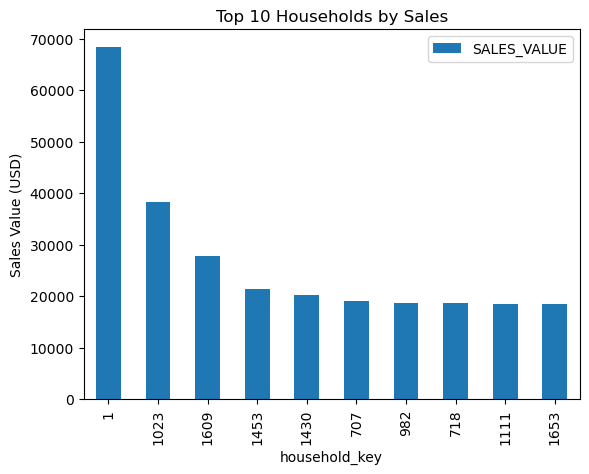

In [39]:
# Plot the total sales value for the top 10 households by value, ordered from highest to lowest.

top10_hh_by_sales.plot.bar(title="Top 10 Households by Sales", ylabel="Sales Value (USD)");

## PRODUCT ANALYSIS

For the last section of this phase of project, I am going to perform analysis on our products data set.
I will be looking to make comaprisons between the various results from the transactions data sets and compare them to the 
products data set to get complete details about the best performing products.

I am going to perform the following analysis:

1. Determine the products that had the most sales by sales_value and plot a horizontal bar chart.
2. Check whether or not the top 10 selling items have a higher than average discount rate.
3. Find the most common PRODUCT_ID among rows with the households in our top 10 households by sales value.
4. Look up the names of the top 10 products by sales in the products.csv dataset.
5. Look up the product name of the item that had the highest quantity sold in a single row.

In [41]:
# Products with the most sales value

top10_pd_by_sales = (transactions
                     .groupby("PRODUCT_ID")
                     .agg({"SALES_VALUE": "sum"})
                     .sort_values(by="SALES_VALUE", ascending=False)
                     .iloc[:10]
)

top10_pd_by_sales

,SALES_VALUE
PRODUCT_ID,
6534178,420088.11
1,64095.00
6533889,42339.31
1029743,33879.06
1082185,24140.83
6533765,23831.14
6534166,23755.70
1106523,22922.80
995242,21221.49


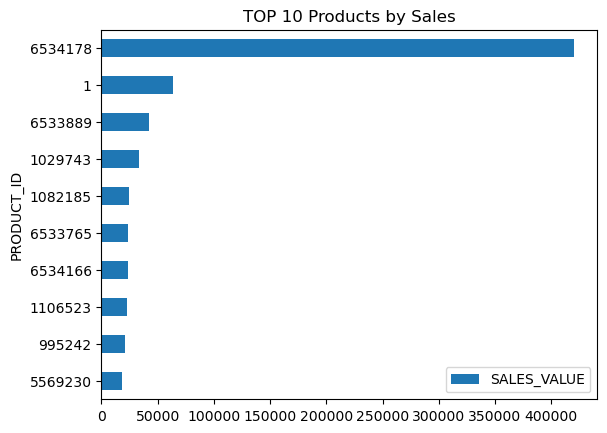

In [43]:
# Plot a horizontal bar chart of the top10 products by sales

top10_pd_by_sales.sort_values("SALES_VALUE").plot.barh(title = "TOP 10 Products by Sales");

# The below horizontal bar chart shows that the product with PRODUCT_ID 6534178 had the most sales value 
#  and also shows other good performing products making up the top 10 products by sales value

In [46]:
# The discount rate of the top 10 products by sales

(transactions.query("PRODUCT_ID in @top10_pd_by_sales.index").loc[:, "total_discount"].sum()/
 transactions.query("PRODUCT_ID in @top10_pd_by_sales.index").loc[:, "SALES_VALUE"].sum()
)

# The top 10 products have a total discount rate of about 3.2%

0.03197957106010176

In [47]:
# discount rate of all products

(transactions.loc[:, "total_discount"].sum()/
 transactions.loc[:, "SALES_VALUE"].sum()
)

# The discount rate of all the products is about 14%

-0.13941669966584644

A discount rate of 3.2% for the top 10 products by sales compared to a total discount rate of 14% for all products indicates a very good business strategy is in place and the retailer does not really need to over discount the most sort after products in order to make good sales.

This is a big consideration in acquiring any retail store, and this target retailer will be a good acquisition.

In [52]:
# To get the most common product_id among the top 10 households by sales value, I'll first:
# Read in the products data set and then,
# match the corresponding product_id in the products dataframe to that of the top 10 hosehold by sales

products = pd.read_csv(
    "C:\\ORIGINAL PFDA RESOURCES\\Pandas+Course+Resources\\Pandas Course Resources\\project_data\\product.csv"
)

products.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [53]:
# PRODUCT_ID of the top 10 hosuehold by sales

top10_hh_by_sales

,SALES_VALUE
household_key,
1,68362.53
1023,38254.92
1609,27752.62
1453,21402.13
1430,20190.53
707,19002.36
982,18629.38
718,18588.10
1111,18558.54


In [67]:
# get the product_id of the top 10 households by sales 

top10_hh_by_sales_product_id = (transactions
 .query("household_key in @top10_hh_by_sales.index")
 .loc[:, "PRODUCT_ID"]
 .value_counts()
 .iloc[:10]
 .index                             
)

# This is the index of the top 10 product_id of the top 10 household relative to the household_key

top10_hh_by_sales_product_id

Int64Index([      1, 6534178, 1082185, 1029743, 6533889, 1127831,  951590,
             995242, 1106523, 9677202],
           dtype='int64')

In [72]:
# query the products table to match the product_id and hence determine the most common product_id

products.query("PRODUCT_ID in @top10_hh_by_sales_product_id").loc[:, "PRODUCT_ID"].value_counts()

#  All product_id are unique and only appears once

951590     1
995242     1
1029743    1
1082185    1
1106523    1
1127831    1
6533889    1
6534178    1
9677202    1
Name: PRODUCT_ID, dtype: int64

In [75]:
# Look up the names of the top 10 products by sales in the products.csv dataset.

products.query("PRODUCT_ID in @top10_pd_by_sales.index").loc[:, ["COMMODITY_DESC", "SUB_COMMODITY_DESC"]]

,COMMODITY_DESC,SUB_COMMODITY_DESC
25754,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY
29657,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY
35576,TROPICAL FRUIT,BANANAS
38262,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY
53097,SOFT DRINKS,SOFT DRINKS 12/18&15PK CAN CAR
57171,FUEL,GASOLINE-REG UNLEADED
57181,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED
57216,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED
57221,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED


In [76]:
# Look up the product name of the item that had the highest quantity sold in a single row.
# The item with the most quantity sold has a PRODUCT_ID of 6534178

products[products["PRODUCT_ID"] == 6534178]

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,


# CONCLUSION

In this phase one of the analysis of the target retailers data, I have been able to take a deep dive into 
the businesses data, answered important statistical question, illustrated sales of various sorts in charts 
and draw insights from the business data.

The results of the analysis points to the fact that :

1. The business has good sales relative to the number of household
2. The top selling products are not even the most discounted, so there is a good discount strategy in place.

In the second phase of our project, I will be looking into more data sets of the target retail, like the household demographic,
this gives more insights about those purchasing their products, their age bracket and income range.
This will further help our clients decide whether or not to go for the acquistiton.

## RECOMMENDATION

Based on this phase of analysis, It is abvious that the target retailer is doing business with the right strategy 
and acquiring them is a good decison, but I will need more analysis to further strengthen this decision 
and back up my claim from this phase of analysis in a phase two project.